<a href="https://colab.research.google.com/github/NUG30/homework-1-mell-crane/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Introduction to Python and NumPy

In this homework, we will learn to do some basic linear algebra (and other numeric) computations using the Python programming language and the NumPy library. First, we want to _import_ the NumPy and Matplotlib libraries, which we will use throughout the homework. You must execute the following code block before you execute any other code in this file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1: adding two matrices
In linear algebra, you learned that adding matrices is easy. To add a matrix $A$ and $B$, you just perform addition component-wise. You cannot, however, add 
two matrices of different dimensions.

In NumPy, matrices are represented as `numpy.array` (for those familiar with computer programming, this name might be misleading). Let us create a $2 \times 3$ matrix in NumPy as an example:

In [ ]:
np.array([[1, 2, 3],
          [4, 5, 6]])

a=5
b=6

np.array([[3, 6, 9, 12],
          [1, 2, 3, 4],
          [a, b, 5, 8]])

array([[ 3,  6,  9, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  5,  8]])

In [ ]:
np.array([["Susan", "David"],
         ["Michael", "Tim"]])

array([['Susan', 'David'],
       ['Michael', 'Tim']], dtype='<U7')

Try changing the dimensions of the matrix and add more (or remove some) elements to the matrix above!

Next, we move on to adding two matrices. We want to add each component of the matrices one by one, so we use a _loop_ to accomplish it. 

In [ ]:
def matrix_add(A, B):
  # create a new array with the same dimensions to hold the result
  # からの行列を作る
  M = np.empty(A.shape)
  # get the height of the array
  m = len(A)
  # iterate through each row
  for i in range(m):
    # get the size of the i-th row
    n = len(A[i])
    # then iterate the row
    for j in range(n):
      M[i][j] = A[i][j] + B[i][j]
  
  # return the final result
  # never forget to RETURN the result of your computation!
  return M

We have defined a _function_ `matrix_add` that takes two arguments, $A$ and $B$, which should be matrices of the same size, and _returns_ the result of the addition. We can run the function to check if our function is correct:

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[2, 3, 4, 5],
              [5, 6, 7, 8]]) # mysterious
matrix_add(A, B)

array([[ 3.,  5.,  7.],
       [ 9., 11., 13.]])

However, there is a flaw in this function! If we give it two matrices of different sizes, the function will fail mysteriously. Try changing the code above to observe what happens. For this reason, we might want to check beforehand that $A$ and $B$ have the same dimensions, and if they do not, we want to be informed that the input is invalid. To do this, we can use a _conditional statement_ to check if they have the same dimensions, and _throw an exception_ if they do not:

In [ ]:
def matrix_add_improved(A, B):
  # check that A and B have the same shape
  if (A.shape != B.shape):
    # if not, then raise an exception
    raise Exception("Cannot add matrices of different dimensions!")

  M = np.empty(A.shape)
  m = len(A)
  for i in range(m):
    n = len(A[i])
    for j in range(n):
      M[i][j] = A[i][j] + B[i][j]
  
  return M

Now, when we attempt to add matrices of different dimensions, we will receive an error that tells us precisely so:

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[1, 2, 3],
              [4, 5, 6]])

matrix_add_improved(A, B)

That's much better! Generally we do not require that you add such "sanity checks" in your programs for this course, but it could never hurt you (and often help you) to do so. In this assignment, we ask you to check for dimensional errors to familiarize you with Python.

Next, it is your turn to do some things!

In [ ]:
matrix = [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]
transpose = []
for i in range(len(matrix[0])):
    tmp = []
    for v in matrix:
        tmp.append(v[i])
    transpose.append(tmp)
 
print(transpose)
matrix[0]

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]


[1, 2, 3]

## Exercise 0: find the transpose of a matrix
Given a matrix $A$, its transpose $A^T$ is just the matrix "rotated 90 degrees". In other words, $A^T[i, j] = A[j, i]$. Now, write a Python function to find the transpose of a given matrix. 
(Hint: what is the dimension of the transpose of a $m \times n$ matrix?)

This exercise is intended as a warm-up, so if you are already quite familiar with Python, you may skip it. If you are not, then you are strongly adviced to attempt it!

In [ ]:
def transpose(A):
  # fill in here
  tr = []
  for i in range(len(A[0])):
    tmp = []
    for j in A:
      tmp.append(j[i])
    tr.append(tmp)
  print(tr)

A = np.array([[1, 2],
              [3, 4]])

transpose(A)

  # remove the line below after you are done
  # raise NotImplemented

[[1, 3], [2, 4]]


In [ ]:
A = np.array([[1, 2],
              [3, 4]])

A.T

array([[1, 3],
       [2, 4]])

## Exercise 1: multiplying two matrices
Again, this is something you learned in your linear algebra class. Given two matrices $A$ and $B$, write a function that multiplies them.

The textbook method to multiply to matrices is sufficient, although this is not the most efficient way. If you have a lot of programming experience, you can try to implement some sort of "fast matrix multiplication", such as [Strassen's algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm).

(Hint: again, pay attention to the dimensions!)

In [ ]:
# Test code of normal version

A = np.random.randint(1, 10, (40, 40))
B = np.random.randint(1, 10, (40, 40))
m = len(A)
C = np.zeros_like(A)

for i in range(m):
  for j in range(m):
    for k in range(m):
      C[i, j] += A[i, k]*B[k, j]

print(C[i,j])

902


In [82]:
# Preparation for calculating
A = np.random.randint(1, 10, (8, 8))

print(A)
a1, a2, = np.split(A, 2)

a11, a12 = np.split(a1, 2, 1)
a21, a22 = np.split(a2, 2, 1)

print(a11)
print(a21)

[[7 3 7 9 7 5 5 6]
 [1 1 2 6 1 2 9 8]
 [7 9 3 3 9 1 1 8]
 [5 5 8 2 6 2 6 4]
 [5 1 7 3 4 4 3 5]
 [1 9 3 9 1 7 1 2]
 [7 8 8 9 1 9 2 1]
 [2 2 7 5 6 4 8 9]]
[[7 3 7 9]
 [1 1 2 6]
 [7 9 3 3]
 [5 5 8 2]]
[[5 1 7 3]
 [1 9 3 9]
 [7 8 8 9]
 [2 2 7 5]]


In [102]:
def matrix_multiply(A, B):
  # fill in here
  # Distoribution
  a1, a2, = np.split(A, 2)
  a11, a12 = np.split(a1, 2, 1)
  a21, a22 = np.split(a2, 2, 1)

  b1, b2, = np.split(B, 2)
  b11, b12 = np.split(b1, 2, 1)
  b21, b22 = np.split(b2, 2, 1)
  
  # Formula
  p1 = (a11+a22)*(b11+b22)
  p2 = (a21+a22)*b11
  p3 = a11*(b12-b22)
  p4 = a22*(b21-b11)
  p5 = (a11+a12)*b22
  p6 = (a21-a11)*(b11+b12)
  p7 = (a11-a21)*(b11+b12)

  # Definition of C
  C = np.zeros_like(A)
  
  c1, c2, = np.split(C, 2)
  c11, c12 = np.split(c1, 2, 1)
  c21, c22 = np.split(c2, 2, 1)

  c11 = p1+p4-p5+p7
  c12 = p3+p5
  c21 = p2+p4
  c22 = p1+p3-p2+p6

  c11 = np.append(c11, c12, axis=1)
  c21 = np.append(c21, c22, axis=1)
  c11 = np.append(c11, c21, axis=0)
  C = c11
  print(C)

A = np.array([[26, 2, -1, 6],
              [1, 57, 3, 9],
              [81, -1, 2, 28],
              [18, 30, 64, 97]])
B = np.array([[34, 42, 67, 20],
              [22, 14, 35, 76],
              [83, 12, 69, 80],
              [4, 6, 7, 9]])

matrix_multiply(A, B)

# Confirming
print(np.dot(A, B))
print(A*B)

# ???????? Why ????????

  # remove the line below after you are done
  # raise NotImplemented

[[-4298  2366  1673   520]
 [ -264  4602    56  4413]
 [ 2920   294  5565  2220]
 [  652  1002  1078  3153]]
[[ 869 1144 1785  646]
 [1573  930 2332 4673]
 [3010 3580 5726 1956]
 [6972 2526 7351 8633]]
[[ 884   84  -67  120]
 [  22  798  105  684]
 [6723  -12  138 2240]
 [  72  180  448  873]]


In fact, NumPy already provides us with a lot of the basic functions required to work with matrices (such as adding, subtracting and multiplying matrices). [Here](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) you can find a brief guide to all of them. From now on you may use all the matrix manipulating (and linear algebraic) functions in NumPy freely.

## Example 2: linear systems of equations
A linear system of $m$ equations and $n$ unknowns can be expressed as $Ax = B$, where $A$ is a $m \times n$ matrix. For example, the system
$$
3x + 2y - z = 12\\
x - y + 3z = 1\\
4x - y + 2z = 5
$$
can be expressed in matrix form as
$$
\begin{bmatrix}
3 & 2 & -1\\
1 & -1 & 3\\
4 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix} =
\begin{bmatrix}
12 \\ 1 \\ 5
\end{bmatrix}.
$$

Then, we can use the function `np.linalg.solve` to solve a linear system of equations in matrix form. From linear algebra class, you know that $A$ must be a square matrix of full rank for the system to have an exact solution. We can use the function `np.linalg.matrix_rank` to confirm this:

In [ ]:
A = np.array([[3, 2, -1],
              [1, -1, 3],
              [4, -1, 2]])

np.linalg.matrix_rank(A)

3

Then, we can solve the system of equations:

In [ ]:
B = np.array([12, 1, 5])
 
np.linalg.solve(A, B)

array([1.7, 4. , 1.1])

## Exercise 2: linear regression
Let $A$ be a $m\times n$-matrix and $y\in \mathbb{R}^m$.
We learned that the "best" solution of a linear system $A \theta = y$ (which might not have exact solutions) is given by the solution of $$(A^T A) \theta = A^T y$$
This solution for $\theta$ minimizes $||A\theta - y||$. If the columns of $A$ are linearly independet (which is usually the case in real life applications), then the $n\times n$-matrix $A^T A$ has full rank, i.e. is invertible and the above euqation can be solved exaclty. 

**2.1** Implement a function `best_solution(A,y)` which takes as an input a matrix $A$ and a vector $y$ as above and which outputs a vector $\theta \in \mathbb{R}^n$, which is the solution of $(A^T A) \theta = A^T y$. Use the function `np.linalg.solve` for this.

In [ ]:
def best_solution(A, y):
  # fill in here
  At = A.T
  P = np.dot(At, A)
  Q = np.dot(At, y)
  Solution = np.linalg.solve(P, Q).tolist()
  return Solution

A = np.array([[3, 2, -1],
              [1, -1, 3],
              [4, -1, 2]])

y = np.array([1, 2, 3])

best_solution(A, y)
type(best_solution(A, y))
best_solution(A, y)[1]

  # remove the line below after you are done
  # raise NotImplemented

3.646206144032093e-16

In [ ]:
A = np.random.randint(1, 10, (4, 4))
y = np.random.randint(1, 10, (4))
print(A)
print(y)
best_solution(A, y)

[[7 3 9 9]
 [4 5 3 2]
 [5 9 8 4]
 [8 3 3 2]]
[6 1 9 8]
[0.9612244897959249, -1.5775510204082124, 4.153061224489901, -3.708163265306217]


In [ ]:
def best_solution2(A, y):
  print(np.linalg.solve(A.transpose().dot(A), A.transpose().dot(y)).tolist())

A = np.array([[3, 2, -1],
              [1, -1, 3],
              [4, -1, 2]])

y = np.array([1, 2, 3])
best_solution2(A, y)

[0.49999999999999994, 3.646206144032093e-16, 0.5000000000000002]


**2.2** Let us consider again the training example of the Tebaski example:

theta0 : 6.489328676755913  theta1: 1.0582072176949942


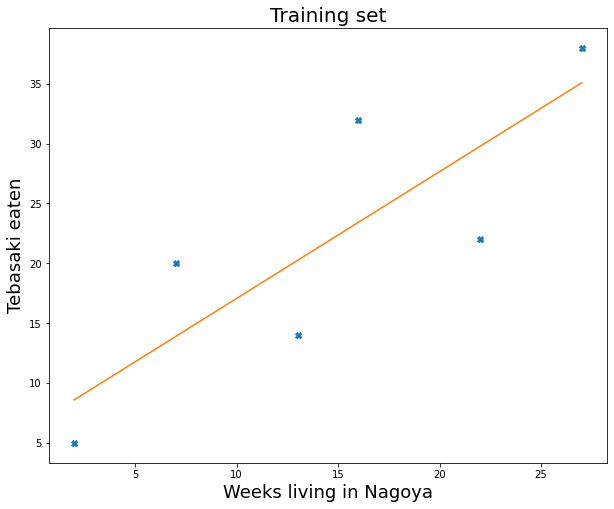

In [103]:
# Training set
Tx = np.array([2, 7, 13, 16, 22, 27])
Ty = np.array([5, 20, 14, 32, 22, 38])

# Draw the Training set
plt.figure(figsize=(10,8))
plt.plot(Tx,Ty,'X')
plt.title("Training set", fontsize =20)
plt.xlabel("Weeks living in Nagoya", fontsize=18)
plt.ylabel("Tebasaki eaten", fontsize=18)

t1, t0 = np.polyfit(Tx, Ty, 1)
plt.plot(Tx, t0+ t1*Tx)
print("theta0 :", t0, " theta1:", t1)
plt.show()

Write a function `best_fit(Tx,Ty)` which returns a vector $\theta = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}$, such that the hypothesis $h(x) = \theta_0 + \theta_1 x$ is the best fit for our trainings set. For this create the corresponding matrix $A$ and vector $y$ from the training set Tx and Ty and use your function `best_solution(A,y)` from 2.1. 

In [ ]:
# Preparation
A=np.array([[1,2],
            [1,7],
            [1,13],
            [1,16],
            [1,22],
            [1,27]])

y=np.array([5, 20, 14, 32, 22, 38])
best_solution(A, y)

[6.489328676755921, 1.058207217694994]

In [ ]:
def best_fit(Tx, Ty):
  # fill in here
  Tx=np.array([[1, 2],
            [1, 7],
            [1, 13],
            [1, 16],
            [1, 22],
            [1, 27]])

  Ty=np.array([5, 20, 14, 32, 22, 38])
  return best_solution(A, y)

best_fit(Tx, Ty)

  # remove the line below after you are done
  # raise NotImplemented

[6.489328676755921, 1.058207217694994]

Plot your result by using the following code:

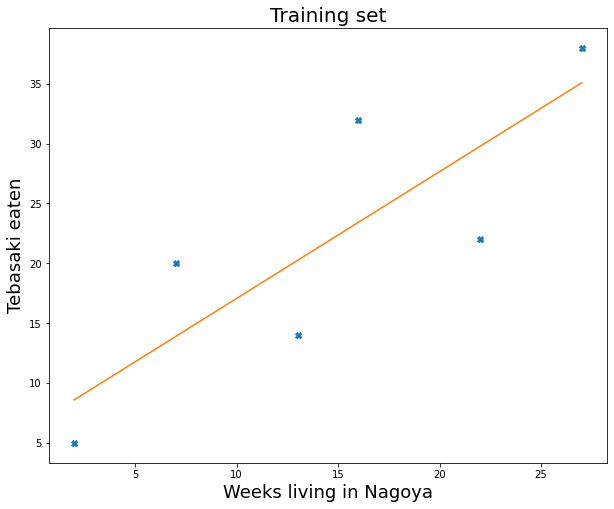

In [ ]:
# Draw the Training set
plt.figure(figsize=(10,8))
plt.plot(Tx,Ty,'X')
plt.title("Training set", fontsize =20)
plt.xlabel("Weeks living in Nagoya", fontsize=18)
plt.ylabel("Tebasaki eaten", fontsize=18)

# Best fit (by using your own function best_fit)
theta = best_fit(Tx, Ty)
plt.plot(Tx, theta[0]+ theta[1]*Tx)
plt.show()

**2.3 (Bonus - Polynom interpolation)** Extend your function in 2.2 to also allow a parameter $d$ (the degree). The function should return a vector $\theta=\begin{pmatrix} \theta_0 \\ \vdots \\ \theta_d \end{pmatrix}$, such that the hypothesis $h(x) = \theta_0 + \theta_1 x + \dots + \theta_d x^d$ gives an interpolation of the trainings set. 

(This function is already implemente in numpy as `np.polyfit(Tx, Ty, d)`, but you should just use your function `best_solution(A,y)` again. If you want to have a 100% self written implementation, then you can also write your own version of `np.linalg.solve` for the use in `best_solution(A,y)`, by implementing the Gaussian elimination algorithm.)

In [101]:
def best_fit2(Tx, Ty, d):
  # fill in here
  n = len(Ty)

  # Solution of linear regression
  A = Tx
  At = A.T
  P = np.dot(At, A)
  y = Ty
  Q = np.dot(At, y)

  # Make Diagonal matrix one
  for i in range(n):
    unit = P[i, i]
    P[i] = P[i]/unit
    y[i] = y[i]/unit
    
    # Make Identity matrix
    for j in range(i+1, n):
      m = P[j, i]
      P[j] -= m*P[i]
      y[j] -= m*y[i]
  x = np.zeros(n)
  for i in reversed(range(n)):
    x[i] = y[i]/P[i, i]
    for j in range(i):
      y[j] -= P[j, i] * x[i]
  fit_solution = x.tolist()
  # return x
  for v in range(n):
    print("{} = {}".format(d[v], fit_solution[v]))

# In this time, this has no Correspondence,
# so maybe results tend to be 0 ???
pre_Tx = np.random.randint(20, 100, (6, 5))
Tx = np.insert(pre_Tx, 0, 1, axis=1)
Ty = np.random.randint(20, 100, (6))

print(Tx)
print(Ty)

l = []
x = 0
for i in range(len(Ty)):
    l.append("theta{}".format(i))
d = l

best_fit2(Tx, Ty,d)

  # remove the line below after you are done
  # raise NotImplemented

[[ 1 91 51 83 96 45]
 [ 1 48 49 45 41 27]
 [ 1 53 40 36 48 39]
 [ 1 32 55 20 49 20]
 [ 1 63 60 79 70 95]
 [ 1 92 91 64 83 52]]
[57 47 35 93 27 74]
theta0 = 129.0
theta1 = -1.0
theta2 = -1.0
theta3 = 0.0
theta4 = 0.0
theta5 = 0.0
